In [1]:
# Set up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [31]:
# Upload the data
X_train = pd.read_csv('data/processed/X_train.csv', index_col=0)
X_test = pd.read_csv('data/processed/X_test.csv', index_col=0)
y_train = pd.read_csv('data/processed/y_train.csv', index_col=0)
y_test = pd.read_csv('data/processed/y_test.csv', index_col=0)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55025 entries, 2905 to 78034
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NUMBRANCH          55025 non-null  float64
 1   UGDS               55025 non-null  float64
 2   TUITFTE            55025 non-null  float64
 3   INEXPFTE           55025 non-null  float64
 4   PFTFAC             55025 non-null  float64
 5   UG25abv            55025 non-null  float64
 6   COMP_ORIG_YR4_RT   55025 non-null  float64
 7   WDRAW_ORIG_YR4_RT  55025 non-null  float64
 8   ENRL_ORIG_YR4_RT   55025 non-null  float64
 9   DEBT_MDN           55025 non-null  float64
 10  Year               55025 non-null  float64
 11  Cost               55025 non-null  float64
 12  Complete           55025 non-null  float64
 13  RetentionFT        55025 non-null  float64
 14  PREDDEG_1          55025 non-null  float64
 15  PREDDEG_2          55025 non-null  float64
 16  PREDDEG_3          

In [33]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55025 entries, 10080 to 62883
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CURROPER  55025 non-null  bool 
dtypes: bool(1)
memory usage: 483.6 KB


In [34]:
y = y_train.CURROPER.ravel()

# Modeling
## Logistic Regression

Hyperparameters to tune:
- C - inverse of regularization strength; positive float; smaller values are stronger regularization, may lead to underfit model; large C may lead to overfitting
- penalty (l1, l2, elasticnet, none) 
- l1_ratio - for elastic-net paramter mixing: l1_ratio = 0 == L2 penalty; l1_ratio = 1 == L1 penalty, so no need to use l1 and l2 as penalty parameters, since they will be encompassed in the elastic net values

In [3]:
# Import and instantiate model
from sklearn.linear_model import LogisticRegression

In [37]:
# Hyperparameter search
from sklearn.model_selection import RandomizedSearchCV

c_grid = [0.001, 0.01, 0.1, 1, 10]
pen_grid = ['elasticnet']
l1_ratio_grid = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]
max_iter_grid = [100, 500, 1000, 1500, 2000]

param_grid = {'C':c_grid, 'penalty':pen_grid, 'l1_ratio':l1_ratio_grid,'max_iter':max_iter_grid}

Note: trying to use pen_grid = ['none', 'elasticnet'] led to errors, since the l1_ratio parameter is only valid for elastic net penatly, not none. If I want to train a model with no penalty, I will have to run a separate Grid search.

In [38]:
logreg = LogisticRegression(solver = 'saga')
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv=5)

Note - default solver 'lbfgs' can't handle elasticnet penalty.
Note - with default max_iter = 100, kept getting ConvergenceWarning: The max_iter was reached which means the coef_ did not converge, so I added max_iter as a grid search parameter

In [40]:
logreg_cv.fit(X_train, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='saga', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'l1_ratio': [0, 0.1, 0.25, 0.5, 0.75,
                                                     0.9, 1],
                                        'max_iter': [100, 500, 1000, 1

In [41]:
print("Best params: " , logreg_cv.best_params_)
print("Best score: ", logreg_cv.best_score_)

Best params:  {'penalty': 'elasticnet', 'max_iter': 2000, 'l1_ratio': 0.25, 'C': 0.001}
Best score:  0.8530667878237166


### Run the model with the best parameters

In [44]:
modelLR = LogisticRegression(C = 0.001, penalty = 'elasticnet', l1_ratio=0.25, max_iter = 2000, solver = 'saga')
start = time.time()
modelLR.fit(X_train, y)
end = time.time()
print("Fit time = ", end - start)

start = time.time()
y_pred = modelLR.predict(X_test)
end = time.time()
print("Predict time = ", end - start)

y_pred_prob = modelLR.predict_proba(X_test)[:, 1]

Fit time =  3.6703898906707764
Predict time =  0.0017561912536621094


### Evaluate the model

In [45]:
# Evaluate model
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[    3  3463]
 [    5 20112]]


In [46]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.38      0.00      0.00      3466
        True       0.85      1.00      0.92     20117

    accuracy                           0.85     23583
   macro avg       0.61      0.50      0.46     23583
weighted avg       0.78      0.85      0.79     23583



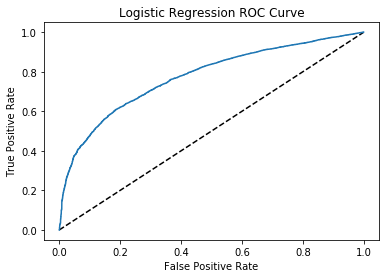

In [47]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot( [0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [48]:
print("AUC: ", roc_auc_score(y_test, y_pred_prob))

AUC:  0.7748365942674477


## Decision Tree
Parameters to search:
max_features
max_depth
min_samples_leaf

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import RandomizedSearchCV

In [ ]:
feature_grid = []
depth_grid = []
leaf_grid = []

param_grid = {'max_features':feature_grid, 'max_depth':max_depth, 'min_samples_leaf':leaf_grid}

In [ ]:
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_grid, cv=5)
tree_cv.fit(X_train, y_train)

In [ ]:
print("Best params: " , tree_cv.best_params_)
print("Best score: ", tree_cv.best_score_)

## Random Forest

Hyperparameters:
- number of features per tree
- number of trees per forest (n_estimators)
- depth(?)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
n_tree_grid = []
depth_grid = []
n_features_tree = [] #'auto'

param_grid = {'n_estimators':n_tree_grid}

In [ ]:
forest = RandomForestClassifier()
forest_cv = RandomizedSearchCV(forest, param_grid, cv=5)